In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.warn("once")
%matplotlib inline
#color = sns.color_palette()

# Graph 한글 표시, https://lsh-story.tistory.com/83
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="./korean.ttf").get_name()
rc('font',family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

print('Python version : ', sys.version)

Python version :  3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


# 2. 통계분석 (사용 데이터: FIFA)

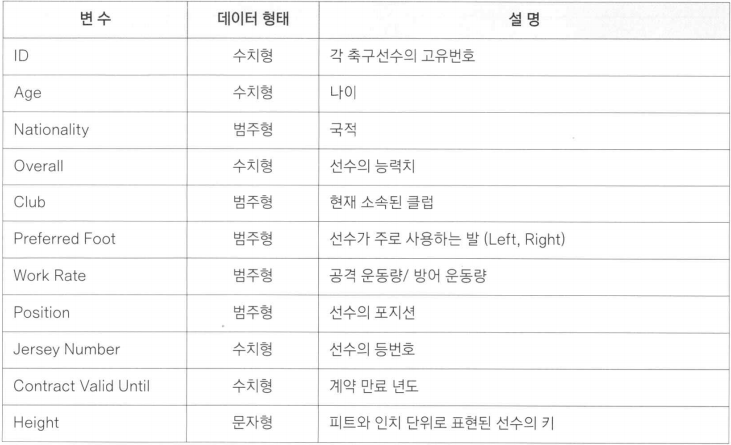

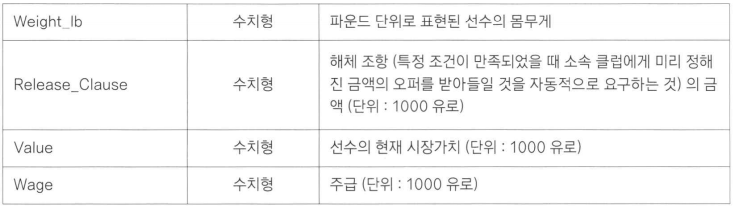

### 1) FIFA데이터에서 각 선수의 키는 Heghit변수에 피트와 인치로 입력되어 있습니다.   
### 이를 cm로 변환하여 새로운 변수 Height_cm을 생성하시오.  
### “ ' ” 앞의 숫자는 피트이며, “ ' ” 뒤의 숫자는 인치, 1피트 = 30cm, 1인치 = 2.5cm)

In [2]:
df = pd.read_csv('./dataset/FIFA.csv', encoding = 'cp949')
df

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,238813,J. Lundstram,19,England,47,Crewe Alexandra,Right,Medium/ Medium,CM,22,2019,5'9,134,143,60,1
16638,243165,N. Christoffersson,19,Sweden,47,Trelleborgs FF,Right,Medium/ Medium,ST,21,2020,6'3,170,113,60,1
16639,241638,B. Worman,16,England,47,Cambridge United,Right,Medium/ Medium,ST,33,2021,5'8,148,165,60,1
16640,246268,D. Walker-Rice,17,England,47,Tranmere Rovers,Right,Medium/ Medium,RW,34,2019,5'10,154,143,60,1


In [3]:
df.info() # 16 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16642 entries, 0 to 16641
Data columns (total 16 columns):
ID                      16642 non-null int64
Name                    16642 non-null object
Age                     16642 non-null int64
Nationality             16642 non-null object
Overall                 16642 non-null int64
Club                    16642 non-null object
Preferred_Foot          16642 non-null object
Work_Rate               16642 non-null object
Position                16642 non-null object
Jersey_Number           16642 non-null int64
Contract_Valid_Until    16642 non-null int64
Height                  16642 non-null object
Weight_lb               16642 non-null int64
Release_Clause          16642 non-null int64
Value                   16642 non-null int64
Wage                    16642 non-null int64
dtypes: int64(9), object(7)
memory usage: 2.0+ MB


In [4]:
df.isna().sum().sum()

0

In [5]:
df['Height'] 

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
16637     5'9
16638     6'3
16639     5'8
16640    5'10
16641    5'10
Name: Height, Length: 16642, dtype: object

In [6]:
buf_list = df['Height'].str.split("'")
cm = []
for buf in buf_list:
    cm.append( float(buf[0])*30 + float(buf[1])*2.5)   

In [7]:
df['Height_cm'] = cm
df['Height_cm'] = df['Height_cm'].round(4)
df[['Height', 'Height_cm']]

,Height,Height_cm
0,5'7,167.5
1,6'2,185.0
2,5'9,172.5
3,6'4,190.0
4,5'11,177.5
...,...,...
16637,5'9,172.5
16638,6'3,187.5
16639,5'8,170.0
16640,5'10,175.0


In [8]:
df.info()  # 17 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16642 entries, 0 to 16641
Data columns (total 17 columns):
ID                      16642 non-null int64
Name                    16642 non-null object
Age                     16642 non-null int64
Nationality             16642 non-null object
Overall                 16642 non-null int64
Club                    16642 non-null object
Preferred_Foot          16642 non-null object
Work_Rate               16642 non-null object
Position                16642 non-null object
Jersey_Number           16642 non-null int64
Contract_Valid_Until    16642 non-null int64
Height                  16642 non-null object
Weight_lb               16642 non-null int64
Release_Clause          16642 non-null int64
Value                   16642 non-null int64
Wage                    16642 non-null int64
Height_cm               16642 non-null float64
dtypes: float64(1), int64(9), object(7)
memory usage: 2.2+ MB


### Q2) 포지션을 의미하는 Position변수를 아래 표를 참고하여 “Forward”, “Midfielder”, 
### “Defender”, “GoalKeeper”로 재범주화하고, factor형으로 변환하여 Position_Class 
### 라는 변수를 생성하고 저장하시오.

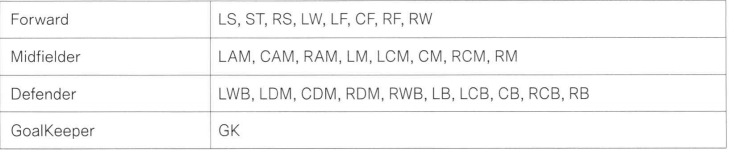

In [9]:
df

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,238813,J. Lundstram,19,England,47,Crewe Alexandra,Right,Medium/ Medium,CM,22,2019,5'9,134,143,60,1,172.5
16638,243165,N. Christoffersson,19,Sweden,47,Trelleborgs FF,Right,Medium/ Medium,ST,21,2020,6'3,170,113,60,1,187.5
16639,241638,B. Worman,16,England,47,Cambridge United,Right,Medium/ Medium,ST,33,2021,5'8,148,165,60,1,170.0
16640,246268,D. Walker-Rice,17,England,47,Tranmere Rovers,Right,Medium/ Medium,RW,34,2019,5'10,154,143,60,1,175.0


In [10]:
df.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LM', 'LB', 'RDM', 'RW',
       'CM', 'RB', 'RAM', 'CF', 'LAM', 'RWB', 'LWB'], dtype=object)

In [11]:
fw  = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
mf  = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM']
dfn = ['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
gk  = ['GK']

In [12]:
df.loc[df['Position'].isin(fw),  'Position_Class'] = 'Forward'   # 1)열생성 2)fw있는 행을 'Forward'로 Write 
df.loc[df['Position'].isin(mf),  'Position_Class'] = 'Midfielder'
df.loc[df['Position'].isin(dfn), 'Position_Class'] = 'Defender'
df.loc[df['Position'].isin(gk),  'Position_Class'] = 'GoalKeeper'

print(df.shape)
df[ ['Position', 'Position_Class']]

(16642, 18)


,Position,Position_Class
0,RF,Forward
1,ST,Forward
2,LW,Forward
3,GK,GoalKeeper
4,RCM,Midfielder
...,...,...
16637,CM,Midfielder
16638,ST,Forward
16639,ST,Forward
16640,RW,Forward


In [13]:
df['Position_Class'].value_counts()

Defender      6763
Midfielder    4935
Forward       3044
GoalKeeper    1900
Name: Position_Class, dtype: int64

### Q3) 새로 생성한 Position_Class 변수의 각 범주에 따른 Value(선수의 시장가치)의 
###      평균값의 차이를 비교하는 일원배치 분산분석을 수행하고 결과를 해석하시오. 
###      그리고 평균값의 차이가 통계적으로 유의하다면 사후검정을 수행하고 설명하시오.

### 포지션별 선수 시장가치 평균값이 통계적으로 유의한지 검정 위해 일원배치 분산분석 수행
    - 귀무가설: 4가지의 포지션에 대해 Value의 평균은 모두 같다.
    - 대립가설: 4가지 포지션에 대해 적어도 하나의 포지션에 대한 Value의 평균값에는 차이가 있다.

In [14]:
# anova (모의고사1-3)
import statsmodels.api as sm
from statsmodels.formula.api import ols      # r 스타일 fit
from statsmodels.stats.anova import anova_lm # anova
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [15]:
df

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_Class
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5,Forward
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0,Forward
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5,Forward
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0,GoalKeeper
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,238813,J. Lundstram,19,England,47,Crewe Alexandra,Right,Medium/ Medium,CM,22,2019,5'9,134,143,60,1,172.5,Midfielder
16638,243165,N. Christoffersson,19,Sweden,47,Trelleborgs FF,Right,Medium/ Medium,ST,21,2020,6'3,170,113,60,1,187.5,Forward
16639,241638,B. Worman,16,England,47,Cambridge United,Right,Medium/ Medium,ST,33,2021,5'8,148,165,60,1,170.0,Forward
16640,246268,D. Walker-Rice,17,England,47,Tranmere Rovers,Right,Medium/ Medium,RW,34,2019,5'10,154,143,60,1,175.0,Forward


In [16]:
df.groupby(['Position_Class'])[['Value']].mean()

,Value
Position_Class,
Defender,2104.653260
Forward,3035.026281
GoalKeeper,1597.268421
Midfielder,2865.531915


In [17]:
model = ols('Value~Position_Class', df).fit()  # ols: r스타일 모형적합
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Position_Class,3.0,4.081181e+09,1.360394e+09,41.873906,5.988667e-27
Residual,16638.0,5.405330e+11,3.248786e+07,NaN,NaN


### 해석
분산분석표를 통해 확인한 결과, SSA의 자유도는 3(집단의 수 -1 = 4-1)  
SST의 자유도는 16638(관측값의 수 - 집단의 수 = 16642-4)임을 확인.  
p값은 매우 작아 유의수준 0.05하에서 귀무가설을 기각한다. 

즉 따라서 포지션별 시장가치가 모두 동일하지 않다고 결론.  
포지션별 시장가치의 평균값들 중 적어도 어느 하나의 포지션은  
통계적으로 유의한 차이가 있다고 말할 수 있다.

### 사후검정
어떠한 포지션이 선수의 시장가치 차이가 있는지 파악하기 위해 사후검정을 수행

In [18]:
posthoc = pairwise_tukeyhsd(df['Value'], df['Position_Class'], alpha=0.05)
print(posthoc)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1     group2    meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------
  Defender    Forward    930.373  0.001   610.7429  1250.0031   True
  Defender GoalKeeper  -507.3848 0.0034  -887.6261  -127.1436   True
  Defender Midfielder   760.8787  0.001   486.7123   1035.045   True
   Forward GoalKeeper -1437.7579  0.001 -1865.9234 -1009.5923   True
   Forward Midfielder  -169.4944 0.5609  -506.9991   168.0104  False
GoalKeeper Midfielder  1268.2635  0.001   872.8782  1663.6488   True
--------------------------------------------------------------------


### 해석
사후검정에서는 귀무가설을 '집단들 사이의 평균은 같다', 대립가설을 '집단들 사이의 평균은  
같지않다'로 두고,모든 집단 수준에 대해서 두 집단씩 짝을 지어 각각 다중 비교를 수행한다.  
  
사후검정 결과를 보면 Midfielder~Forward 간의 비교에 대해 p값이 0.05보다 크므로   
귀무가설을 기각하지 않는다. 즉, Midfielder와 Forward간의 시장가치는 통계적으로  
유의한 차이가 있다고 볼수 없다.  

그러나 다른 모든 포지션 간의 비교에 대해서는 p값이 0.05보다 작으므로 각각의 비교에  
대한 귀무가설을 모두 기각한다. 즉 해당 포지션에 대한 시장가치 평균값은 각각 통계적으로  
유의한 차이가 있다.  

또한 meandiff는 왼쪽 집단과 오른쪽 집단간의 반응값의 차이를 나타내며,  
양수인 경우 오른쪽의 평균이 더 높다.

### Q4) Preferred Foot(주로 사용하는 발)과 Position_Class(재범주화 된 포지션)변수에 
###      따라 Value(이적료)의 차이가 있는지를 알아보기 위해 이원배치분산분석을 
###      수행하고 결과를 해석하시오.

### 귀무가설 
    - 선수의 발에 따른 선수의 가치에는 차이가 없다.  
    - 선수의 포지션에 따른 선수의 가치에는 차이가 없다.  
    - 발과 포지션간의 상호작용 효과가 없다.  

### 대립가설
    - 선수의 발에 따른 선수의 가치에는 차이가 있다. 
    - 선수의 포지션에 따른 선수의 가치에는 차이가 있다.  
    - 발과 포지션간의 상호작용 효과가 있다. 

In [19]:
model = ols('Value ~ Position_Class * Preferred_Foot', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Position_Class,3.0,4.081181e+09,1.360394e+09,41.912369,5.658225e-27
Preferred_Foot,1.0,1.522715e+08,1.522715e+08,4.691332,3.032930e-02
Position_Class:Preferred_Foot,3.0,4.736156e+08,1.578719e+08,4.863874,2.207249e-03
Residual,16634.0,5.399071e+11,3.245805e+07,NaN,NaN


### 해석
이원배치 분산분석 결과 5% 유의수준 하에서 주발의 유의확률은 0.03390,  
포지션의 유의확률은 2e-16로 귀무가설을 기각하여 대립가설을 선택한다.  

즉 주발과 포지션은 선수의 연봉의 차이에 영향을 미치고 있으며,  
주발과 포지션은 상호작용효과를 갖고 있다.  

단 이원배치 분산분석을 통해 연봉 변동의 원인이 주발과 포지션이라는 것은  
알 수 있으나, 이 요소가 어느방향(+,-)으로 영향을 주는지 알 수 없다.

### 5)Age, Overall, Wage, Height_cm, Weight_lb 가 Value에 영향을 미치는지 
### 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.

In [20]:
df

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_Class
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5,Forward
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0,Forward
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5,Forward
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0,GoalKeeper
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,238813,J. Lundstram,19,England,47,Crewe Alexandra,Right,Medium/ Medium,CM,22,2019,5'9,134,143,60,1,172.5,Midfielder
16638,243165,N. Christoffersson,19,Sweden,47,Trelleborgs FF,Right,Medium/ Medium,ST,21,2020,6'3,170,113,60,1,187.5,Forward
16639,241638,B. Worman,16,England,47,Cambridge United,Right,Medium/ Medium,ST,33,2021,5'8,148,165,60,1,170.0,Forward
16640,246268,D. Walker-Rice,17,England,47,Tranmere Rovers,Right,Medium/ Medium,RW,34,2019,5'10,154,143,60,1,175.0,Forward


In [21]:
features = ['Age', 'Overall',  'Wage', 'Height_cm', 'Weight_lb']
df_x = df[features]
y = df['Value'].values
print(f'df_x {df_x.shape}, {type(df_x)}')
display(df_x.head(2))
print(f'y {y.shape}, {type(y)}')

df_x (16642, 5), <class 'pandas.core.frame.DataFrame'>


,Age,Overall,Wage,Height_cm,Weight_lb
0,31,94,565,167.5,159
1,33,94,405,185.0,183


y (16642,), <class 'numpy.ndarray'>


In [22]:
def get_stepwise(df_x, y, SL_in=0.05, SL_out = 0.05): # SL:유의수준
    init_list = list(df_x.columns)  # init feature list
    best_list = []                  # best feature list 
    i=0
    while (len(init_list)>0):                
        var_list = list(set(init_list)-set(best_list)) # feature_list, (set:No Index)
        pValue = pd.Series(index=var_list)             # var_list => pval의 행인덱스
        for var in var_list:                         
            model = sm.OLS(y, sm.add_constant(df_x[best_list+[var]])).fit()
            pValue[var] = model.pvalues[var]
        pValue_min = pValue.min()

        print(f'step%d'%i,'\nvar_list', var_list )
        print(f'pValue_min of var_list : {pValue.idxmin()}({np.round(pValue_min,5)})')
        i=i+1              
        if(pValue_min<SL_in):                 # pValue_min 유의할 경우
            best_list.append(pValue.idxmin()) # pValue(series조합)의 idxmin()은 var_list중 1개 원소
            while(len(best_list)>0):  
                best_list_with_constant = sm.add_constant(df_x[best_list]) 
                pValueBest = sm.OLS(y, best_list_with_constant).fit().pvalues[1:]
                pValue_max = pValueBest.max() 
                if(pValue_max >= SL_out): # pValue_Max가 0.05보다 크면, best_list에서 제거 
                    excluded_feature = pValueBest.idxmax()  # 
                    best_list.remove(excluded_feature)
                else:       # pValue_Max가 0.05보다 작으면, break 
                    print(f'pValue_max of best_list: {pValueBest.idxmax()}({np.round(pValue_max,5)})')
                    print('best_list', best_list, '\n')
                    break 
        else:  # p_value가 유의하지 않으면(0.05보다 작으면) break
            print(f'\nBreak(pValue_min > 0.05)')
            print(f'best_list = {best_list}')
            break
    return best_list 

In [23]:
get_stepwise(df_x, y)

step0 
var_list ['Weight_lb', 'Wage', 'Age', 'Overall', 'Height_cm']
pValue_min of var_list : Wage(0.0)
pValue_max of best_list: Wage(0.0)
best_list ['Wage'] 

step1 
var_list ['Age', 'Overall', 'Weight_lb', 'Height_cm']
pValue_min of var_list : Overall(0.0)
pValue_max of best_list: Wage(0.0)
best_list ['Wage', 'Overall'] 

step2 
var_list ['Age', 'Weight_lb', 'Height_cm']
pValue_min of var_list : Age(0.0)
pValue_max of best_list: Wage(0.0)
best_list ['Wage', 'Overall', 'Age'] 

step3 
var_list ['Weight_lb', 'Height_cm']
pValue_min of var_list : Height_cm(0.00615)
pValue_max of best_list: Height_cm(0.00615)
best_list ['Wage', 'Overall', 'Age', 'Height_cm'] 

step4 
var_list ['Weight_lb']
pValue_min of var_list : Weight_lb(0.34171)

Break(pValue_min > 0.05)
best_list = ['Wage', 'Overall', 'Age', 'Height_cm']


['Wage', 'Overall', 'Age', 'Height_cm']

변수선택법을 수행한 결과 ['Overall', 'Age', 'Wage', 'Height_cm'] 조합이 최적의 모형이다.  
이 변수들을 선택하여 회귀분석을 실시한다.

In [24]:
model = ols('Value ~ Overall + Wage + Age + Height_cm', df).fit()
anova_lm(model)

model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.791      
Dependent Variable: Value            AIC:                309167.6615
Date:               2021-09-11 14:01 BIC:                309206.2600
No. Observations:   16642            Log-Likelihood:     -1.5458e+05
Df Model:           4                F-statistic:        1.572e+04  
Df Residuals:       16637            Prob (F-statistic): 0.00       
R-squared:          0.791            Scale:              6.8474e+06 
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
Intercept  -8690.8178 588.2795 -14.7733 0.0000 -9843.9084 -7537.7273
Overall      241.3450   4.0018  60.3096 0.0000   233.5011   249.1889
Wage         184.1837   1.1278 163.3165 0.0000   181.9731   186.3942
Age         -202.1603   4.9384 -40.9362 0.0000  -211.8401  -192.4805
Height_cm     -8.4446   3.0821  -2.7399 0.0062   -14.4858    -2.4034
--------------------------------------------------------------------
Omnibus:             17089.038     Durbin-Watson:        1.407      
Prob(Omnibus):       0.000         Jarque-Bera (JB):     3525378.426
Skew:                4.665         Prob(JB):             0.000      
Kurtosis:            73.690        Condition No.:        5577       
====================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

### 해석
- 모형은 y = -8690.818 + 184.184*Wage + 241.345*Overall -202.160*Age -8.446*Height_cm
- 모형의 결정계수와 수정된 결정계수는 0.79이다. 
    - 즉, 다변량 회귀식은 전체 데이터의 80%를 설명하고 있다.
- 또한, F통계량은 유의수준 0.05보다 작음으로 모형이 통계적으로 유의하다는 것을 알 수 있다

r 회귀분석 결과와 동일
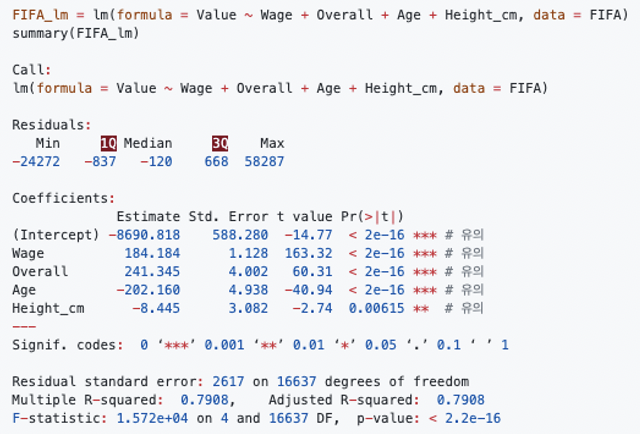